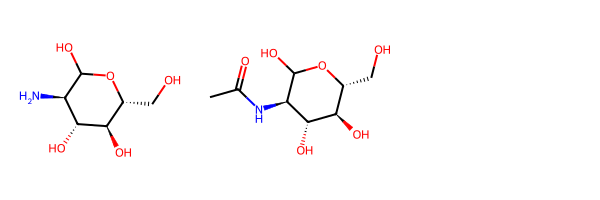

In [1]:
# Suppress OpenEye Toolkits license warnings, RDkit warnings
import warnings
warnings.filterwarnings("ignore")
from rdkit import RDLogger 
RDLogger.DisableLog('rdApp.*')   
#Import monomer to build Chitin (Glucosamine/N-acetyl-D-glucosamine) and visualise using RDkit
from rdkit import Chem
GlcN = Chem.MolFromSmiles('C([C@@H]1[C@H]([C@@H]([C@H](C(O1)O)N)O)O)O')
GlcNAc = Chem.MolFromSmiles('CC(=O)N[C@H]1C(O)O[C@H](CO)[C@@H](O)[C@@H]1O')
Chem.Draw.MolsToGridImage([GlcN,GlcNAc])

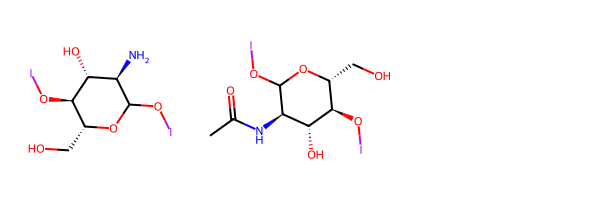

In [2]:
#Add Iodine to mark site 1,4 site where glycosidic bond is formed
GlcNI = Chem.MolFromSmiles('C([C@@H]1[C@H]([C@@H]([C@H](C(O1)OI)N)O)OI)O')
GlcNAcI = Chem.MolFromSmiles('CC(=O)N[C@H]1C(OI)O[C@H](CO)[C@@H](OI)[C@@H]1O')
Chem.Draw.MolsToGridImage([GlcNI,GlcNAcI])

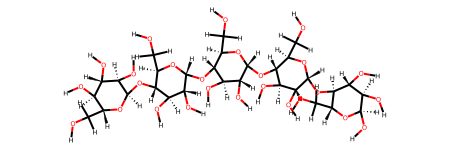

In [3]:
#Build Chitosan (GlcN) polymer using swiftpol
from swiftpol import build
from rdkit.Chem import AllChem
build.build_polymer(sequence='AAAAA', 
                        monomer_list=["C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)OI)O)O)OI)O"],
                        reaction=AllChem.ReactionFromSmarts('[I:1][O:2].[I:3][O:4][C:5]>>[C:5][O:2].[I:3][I:1].[O:4]'),
                        terminal='hydroxyl')

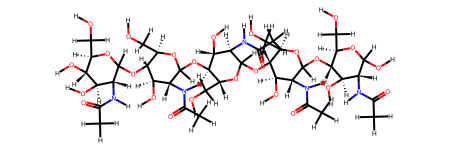

In [4]:
#Build Chitin (GlcNAc) polymer using swiftpol
from swiftpol import build
from rdkit.Chem import AllChem
build.build_polymer(sequence='AAAAA', 
                        monomer_list=['CC(=O)N[C@H]1C(OI)O[C@H](CO)[C@@H](OI)[C@@H]1O'],
                        reaction=AllChem.ReactionFromSmarts('[I:1][O:2].[I:3][O:4][C:5]>>[C:5][O:2].[I:3][I:1].[O:4]'),
                        terminal='hydroxyl')


System built!, size = 3


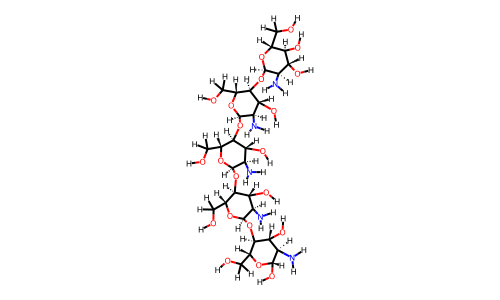

In [5]:
#Build Chitosan (GlcN) polymer ensemble using swiftpol
from rdkit.Chem import AllChem
sys = build.polymer_system(monomer_list = ['C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)OI)N)O)OI)O'], 
               reaction = AllChem.ReactionFromSmarts('[I:1][O:2].[I:3][O:4][C:5]>>[C:5][O:2].[I:3][I:1].[O:4]'), 
               length_target = 5, 
               terminals = 'hydroxyl', 
               num_chains = 3, 
               perc_A_target=100, 
               blockiness_target=1.0, 
               copolymer=False)
sys.chains[0]